In [2]:
import pandas as pd
import numpy as np
import investpy
from datetime import datetime
from datetime import timedelta

end_date = datetime.today().strftime('%d/%m/%Y')
start_date = datetime.now() - timedelta(days=2*365)
start_date = start_date.strftime('%d/%m/%Y')

In [3]:
data_bitcoin = investpy.get_crypto_historical_data(crypto='bitcoin', from_date=start_date, to_date=end_date)

data_bitcoin.rename(columns={"Close": "Price"},inplace=True)
data_bitcoin = data_bitcoin.iloc[::-1]
print(data_bitcoin.iloc[:,3:4])

              Price
Date               
2020-12-03  18988.6
2020-12-02  19218.8
2020-12-01  18770.7
2020-11-30  19698.1
2020-11-29  18185.5
...             ...
2018-12-08   3430.4
2018-12-07   3422.2
2018-12-06   3508.6
2018-12-05   3771.6
2018-12-04   3958.5

[731 rows x 1 columns]


In [4]:
data_ether = investpy.get_crypto_historical_data(crypto='ethereum', from_date=start_date, to_date=end_date)

data_ether.rename(columns={"Close": "Price"},inplace=True)
data_ether = data_ether.iloc[::-1]
print(data_ether.iloc[:,3:4])

             Price
Date              
2020-12-03  589.55
2020-12-02  598.05
2020-12-01  585.66
2020-11-30  615.92
2020-11-29  575.45
...            ...
2018-12-08   90.57
2018-12-07   93.27
2018-12-06   90.86
2018-12-05  102.33
2018-12-04  110.09

[731 rows x 1 columns]


In [5]:
data_xrp = investpy.get_crypto_historical_data(crypto='xrp', from_date=start_date, to_date=end_date)

data_xrp.rename(columns={"Close": "Price"},inplace=True)
data_xrp = data_xrp.iloc[::-1]
print(data_xrp.iloc[:,3:4])

              Price
Date               
2020-12-03  0.62050
2020-12-02  0.63065
2020-12-01  0.61084
2020-11-30  0.66386
2020-11-29  0.60534
...             ...
2018-12-08  0.30414
2018-12-07  0.30165
2018-12-06  0.30879
2018-12-05  0.33849
2018-12-04  0.35312

[731 rows x 1 columns]


In [6]:
data_sp500 = investpy.get_index_historical_data(index='S&P 500',
                                        country='United States',
                                        from_date=start_date,
                                        to_date=end_date)

data_sp500.rename(columns={"Close": "Price"},inplace=True)
data_sp500 = data_sp500.iloc[::-1]
print(data_sp500.iloc[:,3:4])

              Price
Date               
2020-12-02  3669.01
2020-12-01  3662.45
2020-11-30  3621.63
2020-11-27  3638.35
2020-11-25  3629.65
...             ...
2018-12-11  2636.78
2018-12-10  2637.72
2018-12-07  2633.08
2018-12-06  2695.95
2018-12-04  2700.06

[503 rows x 1 columns]


In [7]:
data_comb = pd.DataFrame(index= data_sp500.index)
list_bitcoin = []
list_ether = []
list_xrp = []
for date1 in data_sp500.index:
    for date2 in data_bitcoin.index:
        if date1 == date2:
            list_bitcoin.append(data_bitcoin.loc[date1,'Price'])
            continue
    for date3 in data_ether.index:
        if date1 == date3:
            list_ether.append(data_ether.loc[date1,'Price'])
            continue
    for date4 in data_xrp.index:
        if date1 == date4:
            list_xrp.append(data_xrp.loc[date1,'Price'])
            continue
            
data_comb["S&P 500"] = data_sp500['Price']
data_comb["BTC"] = list_bitcoin  
data_comb["ETH"] = list_ether  
data_comb["XRP"] = list_xrp   
print(data_comb)

            S&P 500      BTC     ETH      XRP
Date                                         
2020-12-02  3669.01  19218.8  598.05  0.63065
2020-12-01  3662.45  18770.7  585.66  0.61084
2020-11-30  3621.63  19698.1  615.92  0.66386
2020-11-27  3638.35  17127.1  518.11  0.56120
2020-11-25  3629.65  18723.0  569.67  0.63224
...             ...      ...     ...      ...
2018-12-11  2636.78   3407.7   88.32  0.30186
2018-12-10  2637.72   3460.5   90.17  0.30114
2018-12-07  2633.08   3422.2   93.27  0.30165
2018-12-06  2695.95   3508.6   90.86  0.30879
2018-12-04  2700.06   3958.5  110.09  0.35312

[503 rows x 4 columns]


In [8]:
data_comb = data_comb.assign(Std_SP500 = lambda x:((x['S&P 500']-x['S&P 500'].min())/(x['S&P 500'].max()-x['S&P 500'].min())* 100))
data_comb = data_comb.assign(Std_BTC = lambda x:((x['BTC']-x['BTC'].min())/(x['BTC'].max()-x['BTC'].min())* 100))
data_comb = data_comb.assign(Std_ETH = lambda x:((x['ETH']-x['ETH'].min())/(x['ETH'].max()-x['ETH'].min())* 100))
data_comb = data_comb.assign(Std_XRP = lambda x:((x['XRP']-x['XRP'].min())/(x['XRP'].max()-x['XRP'].min())* 100))

print(data_comb)

            S&P 500      BTC     ETH      XRP   Std_SP500     Std_BTC  \
Date                                                                    
2020-12-02  3669.01  19218.8  598.05  0.63065  100.000000   97.086375   
2020-12-01  3662.45  18770.7  585.66  0.61084   99.541775   94.362413   
2020-11-30  3621.63  19698.1  615.92  0.66386   96.690439  100.000000   
2020-11-27  3638.35  17127.1  518.11  0.56120   97.858355   84.371106   
2020-11-25  3629.65  18723.0  569.67  0.63224   97.250648   94.072449   
...             ...      ...     ...      ...         ...         ...   
2018-12-11  2636.78   3407.7   88.32  0.30186   27.897263    0.972019   
2018-12-10  2637.72   3460.5   90.17  0.30114   27.962923    1.292986   
2018-12-07  2633.08   3422.2   93.27  0.30165   27.638812    1.060163   
2018-12-06  2695.95   3508.6   90.86  0.30879   32.030371    1.585381   
2018-12-04  2700.06   3958.5  110.09  0.35312   32.317461    4.320286   

               Std_ETH    Std_XRP  
Date          

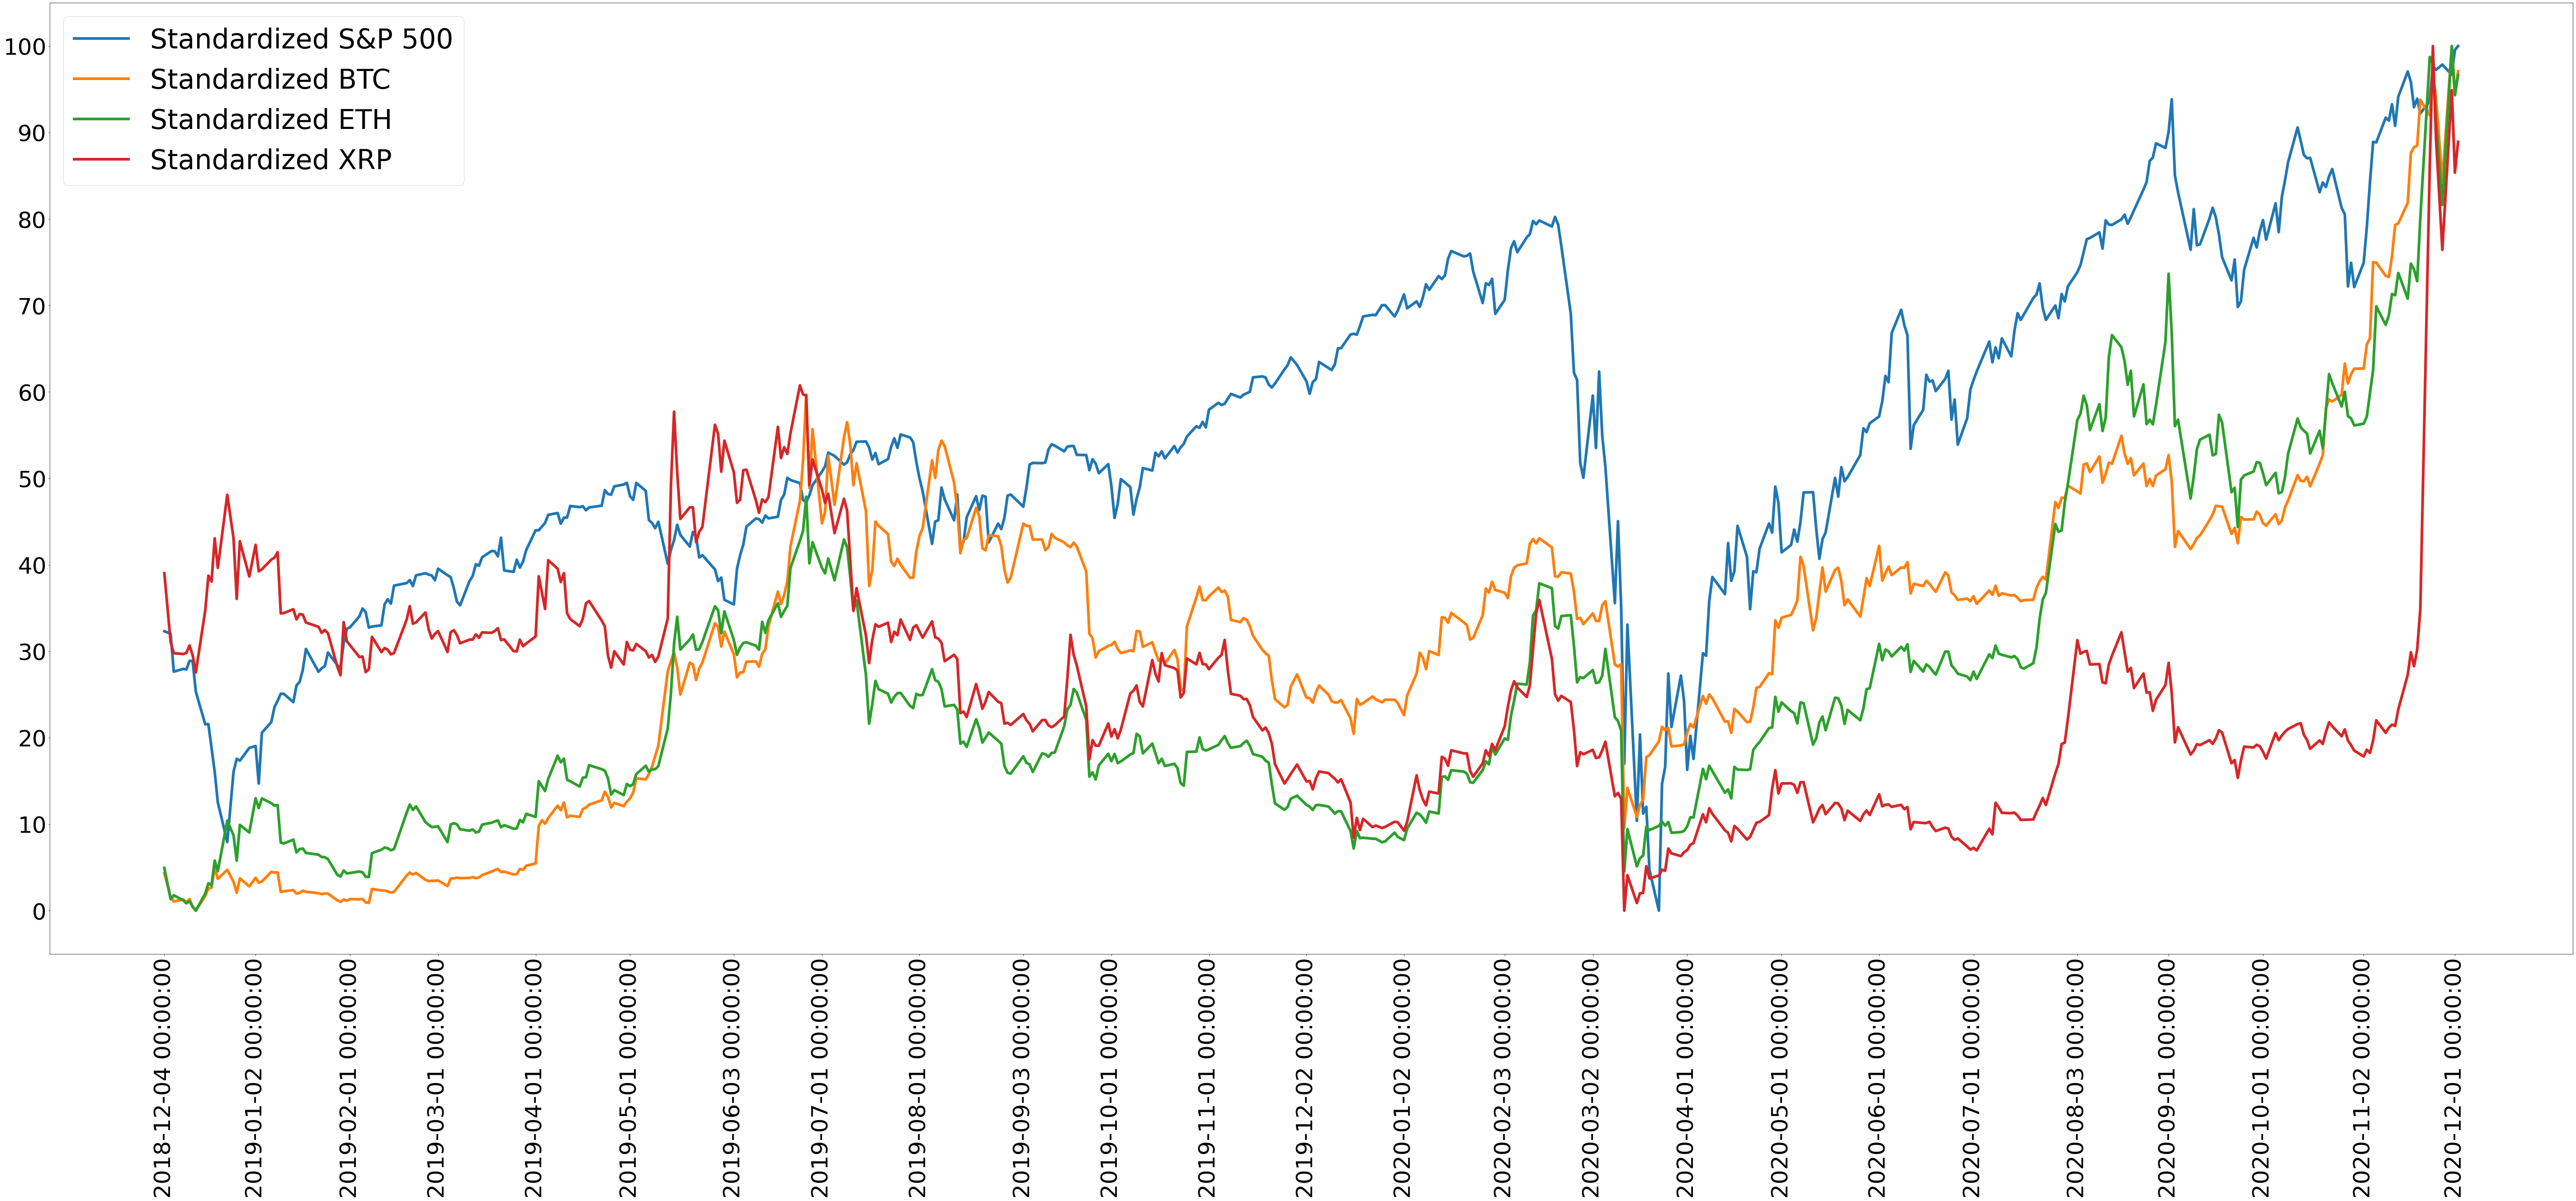

In [43]:
import matplotlib.pyplot as plt

dates_list = []
months_list = []

reverse_data_comb = data_comb.index[::-1]
for i in range(0,len(reverse_data_comb)):
    if reverse_data_comb[i].strftime('%m/%Y') not in months_list:
        months_list.append(reverse_data_comb[i].strftime('%m/%Y'))
        dates_list.append(datetime.strptime(reverse_data_comb[i].strftime('%d/%m/%Y'), '%d/%m/%Y'))

plt.figure(figsize=(100, 40))
plt.plot(data_comb.index,data_comb['Std_SP500'], label="Standardized S&P 500",linewidth=6.0)
plt.plot(data_comb.index,data_comb['Std_BTC'], label="Standardized BTC",linewidth=6.0)
plt.plot(data_comb.index,data_comb['Std_ETH'], label="Standardized ETH",linewidth=6.0)
plt.plot(data_comb.index,data_comb['Std_XRP'], label="Standardized XRP",linewidth=6.0)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100], fontsize=50)

plt.xticks(dates_list,dates_list,fontsize=50,rotation=90, wrap=0)
plt.subplots_adjust(bottom = 0.15) #try making the graph small


plt.legend(loc=0, prop={'size': 60})
plt.show()

In [44]:
print(type(data_comb.index))
print(type(dates_list))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'list'>


In [45]:
print(type(data_comb.index[0]))
print(type(dates_list[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'datetime.datetime'>


In [46]:
print(data_comb.index[0])
print(dates_list[0])

2020-12-02 00:00:00
2018-12-04 00:00:00


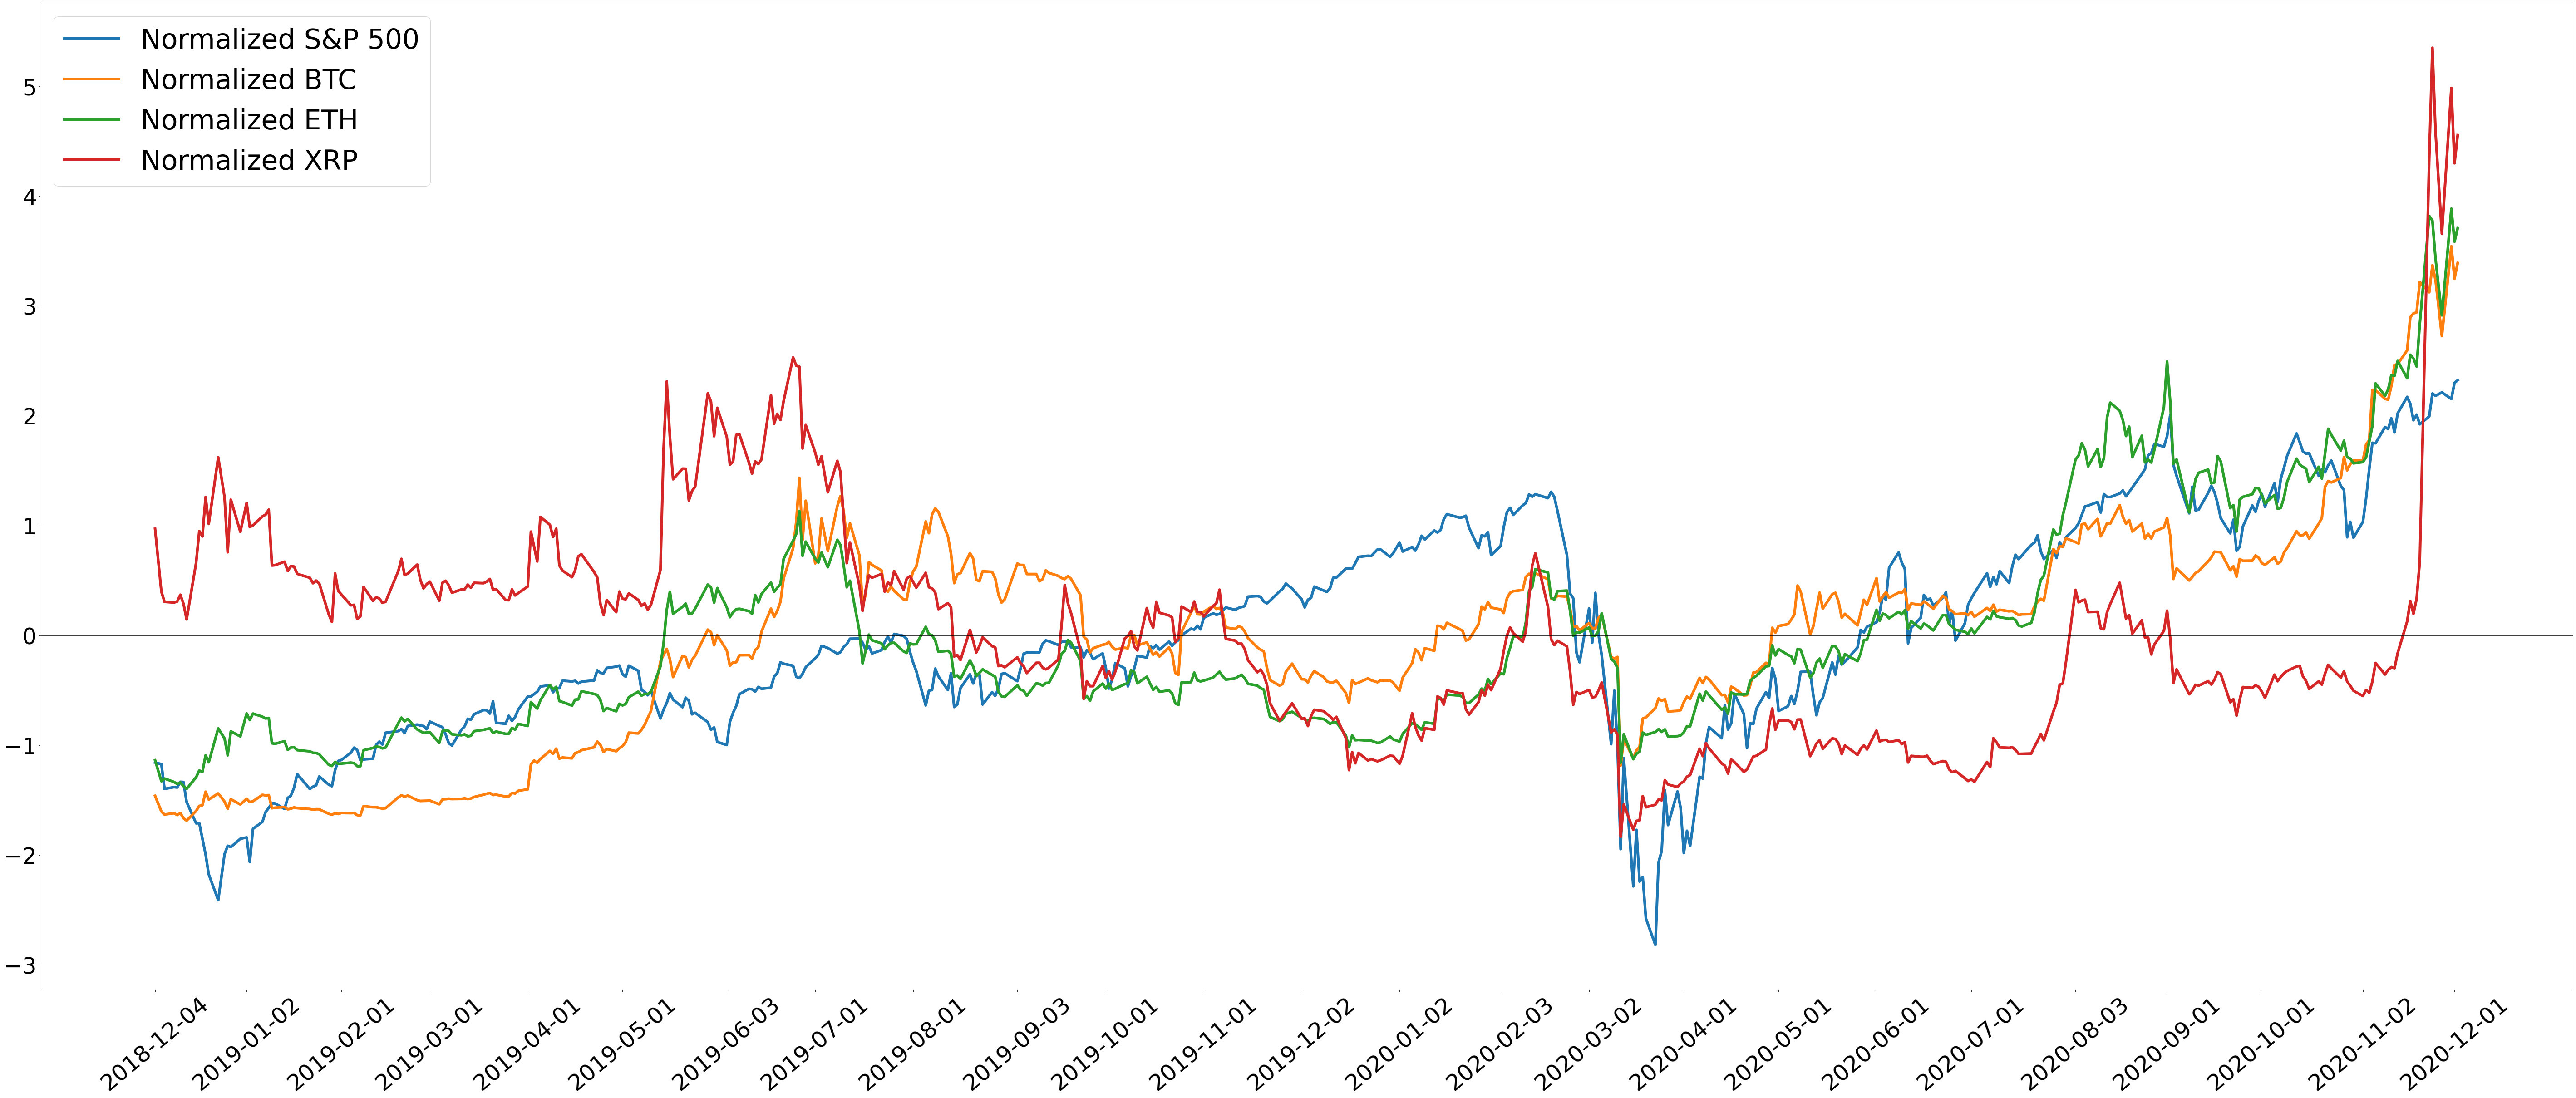

In [47]:
from sklearn.preprocessing import StandardScaler
data_comb[['Std_SP500']] = StandardScaler().fit_transform(data_comb[['S&P 500']])
data_comb[['Std_BTC']] = StandardScaler().fit_transform(data_comb[['BTC']])
data_comb[['Std_ETH']] = StandardScaler().fit_transform(data_comb[['ETH']])
data_comb[['Std_XRP']] = StandardScaler().fit_transform(data_comb[['XRP']])

dates_list = []
months_list = []

reverse_data_comb = data_comb.index[::-1]
for i in range(0,len(reverse_data_comb)):
    if reverse_data_comb[i].strftime('%m/%Y') not in months_list:
        months_list.append(reverse_data_comb[i].strftime('%m/%Y'))
        dates_list.append(datetime.strptime(reverse_data_comb[i].strftime('%d/%m/%Y'), '%d/%m/%Y'))

plt.figure(figsize=(100, 40))
plt.plot(data_comb.index,data_comb['Std_SP500'], label="Normalized S&P 500",linewidth=6.0)
plt.plot(data_comb.index,data_comb['Std_BTC'], label="Normalized BTC",linewidth=6.0)
plt.plot(data_comb.index,data_comb['Std_ETH'], label="Normalized ETH",linewidth=6.0)
plt.plot(data_comb.index,data_comb['Std_XRP'], label="Normalized XRP",linewidth=6.0)
plt.axhline(y=0, color='black', linestyle='-')
plt.yticks(fontsize=50)

plt.xticks(dates_list,fontsize=50,rotation=40)

plt.legend(loc=0, prop={'size': 60})
plt.show()